In [1]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

from poliastro.bodies import Venus, Earth, Mars
from poliastro.plotting.tisserand import TisserandPlotter, TisserandKind
from poliastro.plotting._base import BODY_COLORS
# Let us import the rest of the planets
from poliastro.bodies import Mercury, Jupiter, Saturn, Uranus, Neptune

SS_BODIES_INNER = [
    Mercury,
    Venus,
    Earth,
    Mars,
]
SS_BODIES_OUTTER = [
    Jupiter,
    Saturn,
    Uranus,
    Neptune,
]

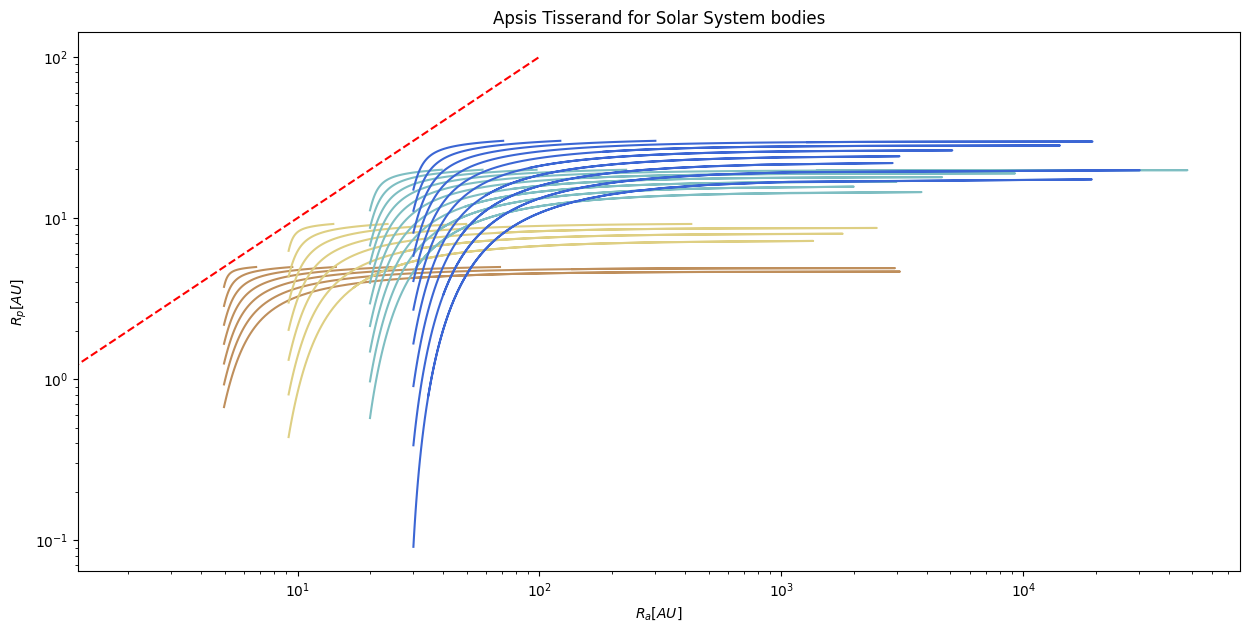

In [4]:
# Prellocate Tisserand figure
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title("Apsis Tisserand for Solar System bodies")
ax.set_xlabel("$R_{a} [AU]$")
ax.set_ylabel("$R_{p} [AU]$")
ax.set_xscale("log")
ax.set_yscale("log")

# Build tisserand
tp = TisserandPlotter(axes=ax, kind=TisserandKind.APSIS)

# Show perfect circular orbits
r = np.linspace(0, 10**2) * u.AU
tp.ax.plot(r, r, linestyle="--", color="red")

# # Generate lines for inner planets
# for planet in SS_BODIES_INNER:
#     tp.plot(planet, (1, 12) * u.km / u.s, num_contours=12)

# Generate lines for outter planets
for planet in SS_BODIES_OUTTER:
    if planet == Jupiter or planet == Saturn:
        tp.plot(planet, (1, 7) * u.km / u.s, num_contours=7)
    else:
        tp.plot(planet, (1, 5) * u.km / u.s, num_contours=10)


Io:
  Radius: 1822 km
  GM (μ): 5.96e+03 km3 / s2
  Max deflection at V∞=1 km/s: 53.30°
  Max deflection at V∞=5 km/s: 13.09°

Europa:
  Radius: 1561 km
  GM (μ): 3.20e+03 km3 / s2
  Max deflection at V∞=1 km/s: 39.47°
  Max deflection at V∞=5 km/s: 8.55°

Ganymede:
  Radius: 2634 km
  GM (μ): 9.89e+03 km3 / s2
  Max deflection at V∞=1 km/s: 57.79°
  Max deflection at V∞=5 km/s: 14.80°

Callisto:
  Radius: 2410 km
  GM (μ): 7.18e+03 km3 / s2
  Max deflection at V∞=1 km/s: 50.40°
  Max deflection at V∞=5 km/s: 12.05°


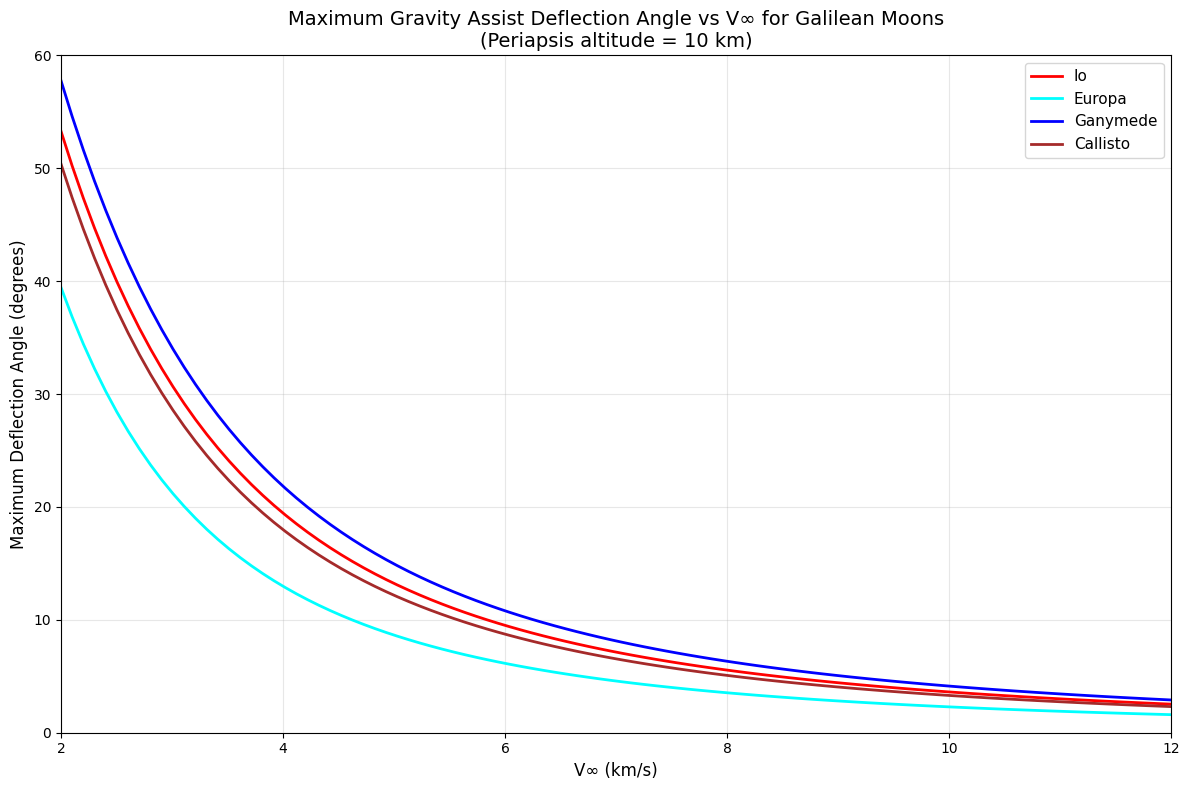


NOTES:
- Lower V∞ allows larger deflection angles
- More massive moons (Ganymede, Callisto) provide larger deflections
- At high V∞, deflections become very small regardless of moon


In [7]:
## Maximum Deflection Angle vs V-infinity for Galilean Moons
# Calculate and plot the maximum gravity assist deflection angle as a function of approach velocity

import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from poliastro.bodies import Io, Europa, Ganymede, Callisto

# Configuration
r_p_altitude = 10 * u.km  # Periapsis altitude above surface
v_inf_range = np.linspace(2, 12, 100) * u.km / u.s  # Range of V-infinity values

# Galilean moons
moons = [
    (Io, "Io", "red"),
    (Europa, "Europa", "cyan"),
    (Ganymede, "Ganymede", "blue"),
    (Callisto, "Callisto", "brown")
]

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Maximum Gravity Assist Deflection Angle vs V∞ for Galilean Moons\n(Periapsis altitude = 10 km)", fontsize=14)
ax.set_xlabel("V∞ (km/s)", fontsize=12)
ax.set_ylabel("Maximum Deflection Angle (degrees)", fontsize=12)
ax.grid(True, alpha=0.3)

# Calculate and plot for each moon
for moon, name, color in moons:
    # Periapsis distance from center
    r_p = moon.R + r_p_altitude
    
    # Calculate deflection angle for each V-infinity
    # Formula: δ = 2 * arcsin(1 / (1 + r_p * v_inf^2 / μ))
    deflection_angles = []
    
    for v_inf in v_inf_range:
        # Calculate deflection angle using patched conic gravity assist formula
        delta = 2 * np.arcsin(1 / ((r_p * v_inf**2 / moon.k) + 1 * u.one))
        deflection_angles.append(np.degrees(delta.value))
    
    # Plot
    ax.plot(v_inf_range.value, deflection_angles, label=name, color=color, linewidth=2)
    
    # Print some key values
    print(f"\n{name}:")
    print(f"  Radius: {moon.R.to(u.km):.0f}")
    print(f"  GM (μ): {moon.k.to(u.km**3/u.s**2):.2e}")
    print(f"  Max deflection at V∞=1 km/s: {deflection_angles[np.argmin(np.abs(v_inf_range.value - 1.0))]:.2f}°")
    print(f"  Max deflection at V∞=5 km/s: {deflection_angles[np.argmin(np.abs(v_inf_range.value - 5.0))]:.2f}°")

ax.legend(fontsize=11)
ax.set_xlim(v_inf_range.value[0], v_inf_range.value[-1])
ax.set_ylim(0, 60)

# Add reference lines
ax.axhline(y=90, color='gray', linestyle='--', alpha=0.5, label='90° (right angle)')
ax.axhline(y=180, color='gray', linestyle=':', alpha=0.5, label='180° (U-turn)')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("NOTES:")
print("- Lower V∞ allows larger deflection angles")
print("- More massive moons (Ganymede, Callisto) provide larger deflections")
print("- At high V∞, deflections become very small regardless of moon")
print("=" * 60)


Jupiter:
  Radius: 71492 km
  GM (μ): 1.27e+08 km3 / s2
  Max deflection at V∞=5 km/s: 160.62°
  Max deflection at V∞=10 km/s: 142.06°
  Max deflection at V∞=15 km/s: 124.71°

Saturn:
  Radius: 60268 km
  GM (μ): 3.79e+07 km3 / s2
  Max deflection at V∞=5 km/s: 147.78°
  Max deflection at V∞=10 km/s: 118.74°
  Max deflection at V∞=15 km/s: 94.31°

Uranus:
  Radius: 25559 km
  GM (μ): 5.79e+06 km3 / s2
  Max deflection at V∞=5 km/s: 127.29°
  Max deflection at V∞=10 km/s: 86.44°
  Max deflection at V∞=15 km/s: 58.94°

Neptune:
  Radius: 24764 km
  GM (μ): 6.84e+06 km3 / s2
  Max deflection at V∞=5 km/s: 131.83°
  Max deflection at V∞=10 km/s: 93.02°
  Max deflection at V∞=15 km/s: 65.48°


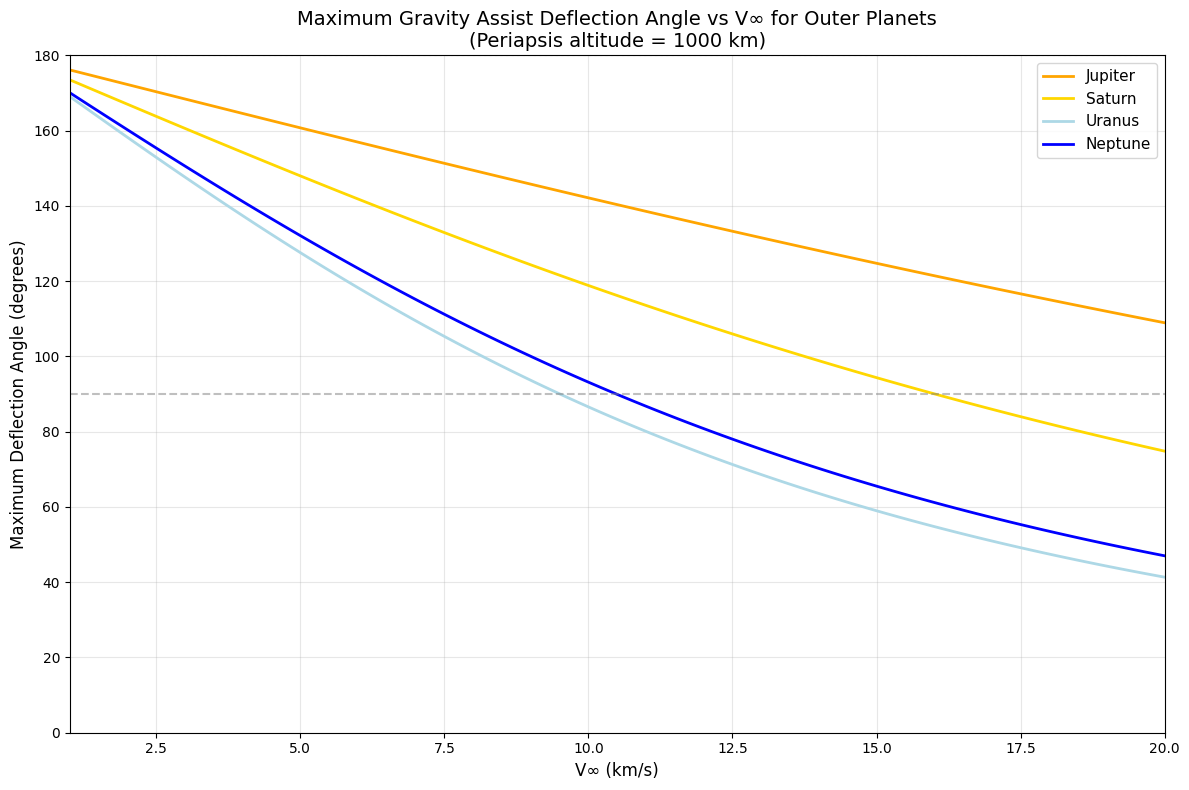


NOTES:
- Jupiter provides the most dramatic gravity assists due to its massive μ
- Saturn is also very effective, followed by Neptune and Uranus
- Typical interplanetary V∞ values are 5-15 km/s
- Lower V∞ allows larger deflection angles for all planets


In [3]:
## Maximum Deflection Angle vs V-infinity for Outer Planets
# Calculate and plot the maximum gravity assist deflection angle as a function of approach velocity

import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from poliastro.bodies import Jupiter, Saturn, Uranus, Neptune

# Configuration
r_p_altitude = 1000 * u.km  # Periapsis altitude above surface (higher for safety with planets)
v_inf_range = np.linspace(1, 20, 100) * u.km / u.s  # Range of V-infinity values (higher for planets)

# Outer planets
planets = [
    (Jupiter, "Jupiter", "orange"),
    (Saturn, "Saturn", "gold"),
    (Uranus, "Uranus", "lightblue"),
    (Neptune, "Neptune", "blue")
]

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Maximum Gravity Assist Deflection Angle vs V∞ for Outer Planets\n(Periapsis altitude = 1000 km)", fontsize=14)
ax.set_xlabel("V∞ (km/s)", fontsize=12)
ax.set_ylabel("Maximum Deflection Angle (degrees)", fontsize=12)
ax.grid(True, alpha=0.3)

# Calculate and plot for each planet
for planet, name, color in planets:
    # Periapsis distance from center
    r_p = planet.R + r_p_altitude
    
    # Calculate deflection angle for each V-infinity
    # Formula: δ = 2 * arcsin(1 / (1 + r_p * v_inf^2 / μ))
    deflection_angles = []
    
    for v_inf in v_inf_range:
        # Calculate deflection angle using patched conic gravity assist formula
        delta = 2 * np.arcsin(1 / ((r_p * v_inf**2 / planet.k) + 1 * u.one))
        deflection_angles.append(np.degrees(delta.value))
    
    # Plot
    ax.plot(v_inf_range.value, deflection_angles, label=name, color=color, linewidth=2)
    
    # Print some key values
    print(f"\n{name}:")
    print(f"  Radius: {planet.R.to(u.km):.0f}")
    print(f"  GM (μ): {planet.k.to(u.km**3/u.s**2):.2e}")
    print(f"  Max deflection at V∞=5 km/s: {deflection_angles[np.argmin(np.abs(v_inf_range.value - 5.0))]:.2f}°")
    print(f"  Max deflection at V∞=10 km/s: {deflection_angles[np.argmin(np.abs(v_inf_range.value - 10.0))]:.2f}°")
    print(f"  Max deflection at V∞=15 km/s: {deflection_angles[np.argmin(np.abs(v_inf_range.value - 15.0))]:.2f}°")

ax.legend(fontsize=11)
ax.set_xlim(v_inf_range.value[0], v_inf_range.value[-1])
ax.set_ylim(0, 180)

# Add reference lines
ax.axhline(y=90, color='gray', linestyle='--', alpha=0.5, label='90° (right angle)')
ax.axhline(y=180, color='gray', linestyle=':', alpha=0.5, label='180° (U-turn)')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("NOTES:")
print("- Jupiter provides the most dramatic gravity assists due to its massive μ")
print("- Saturn is also very effective, followed by Neptune and Uranus")
print("- Typical interplanetary V∞ values are 5-15 km/s")
print("- Lower V∞ allows larger deflection angles for all planets")
print("=" * 60)